# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## The Data

Let's start by reading in the train.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shwetachandel/Black-Friday-Dataset/master/Black%20Friday%20Dataset/train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data
We can use isnull().sum() and mean() to see where we are missing data!

In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

Roughly 30 percent of the Product_Category_2 data is missing. The proportion of Product_Category_2 missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Product_Category_3 column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later.

## Data Cleaning

We want to fill in missing Product_Category_2 data instead of just dropping the missing Product_Category_2 data rows. One way to do this is by filling 'others' in null values as product category 2 is discrete.

In [6]:
df.Product_Category_2.fillna('Others',inplace=True)

In [7]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

We can also drop user id and product id which not affects sales

In [8]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

As we know Product_Category_1 and occupation is discrete but it takes as countinous. to prevent this we have to convert it into str type

In [9]:
df["Product_Category_1"]= df["Product_Category_1"].astype(str)

In [10]:
df["Occupation"]= df["Occupation"].astype(str)

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,Others,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,Others,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,Others,7969


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  object
 7   Product_Category_2          550068 non-null  object
 8   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 37.8+ MB


# Gender

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


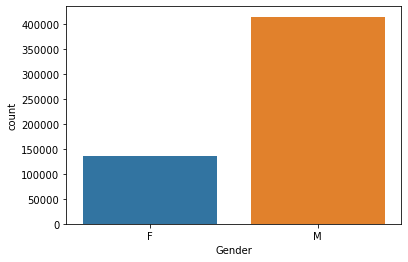

In [12]:
sns.countplot(df['Gender'])
plt.show()

In [13]:
df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [14]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

# Marital_Status

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


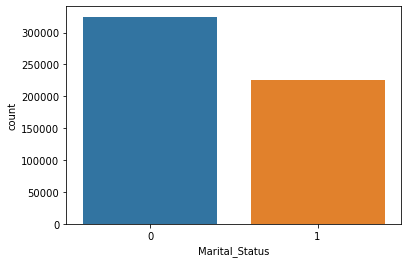

In [15]:
sns.countplot(df['Marital_Status'])
plt.show()

In [16]:
df.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

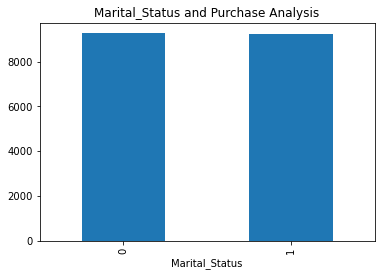

In [17]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

# City_Category

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


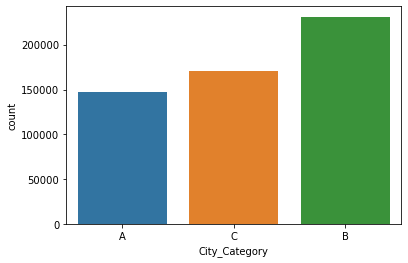

In [18]:
sns.countplot(df['City_Category'])
plt.show()

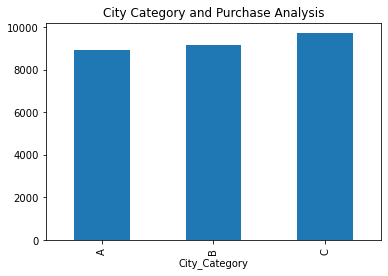

In [19]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

# Stay_In_Current_City_Years

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


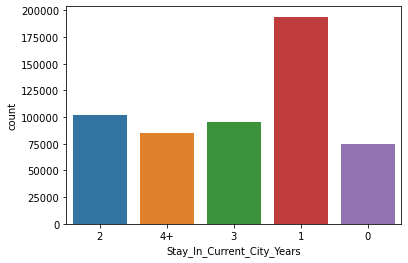

In [20]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

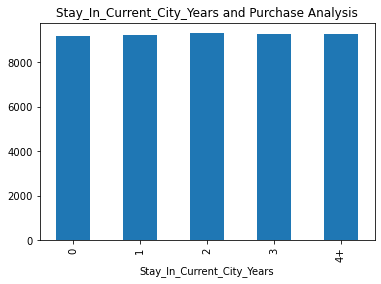

In [21]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

# Age

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


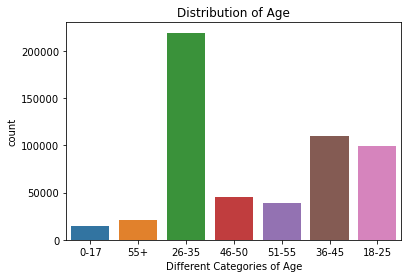

In [22]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<AxesSubplot:xlabel='Age'>

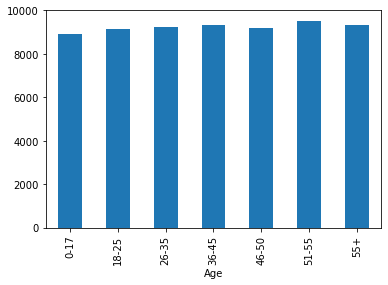

In [23]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')

# Product Category 1

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


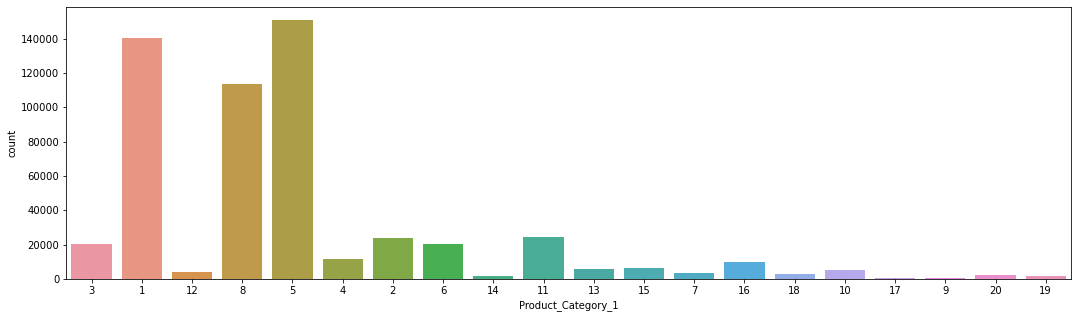

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])
plt.show()

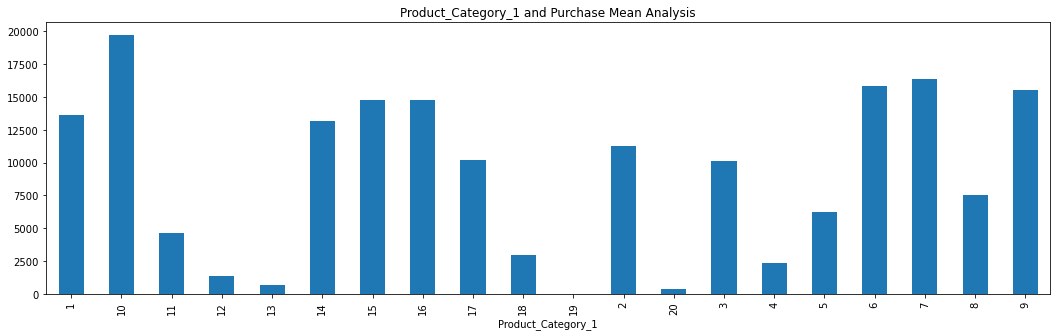

In [25]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

# Product Category 2

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


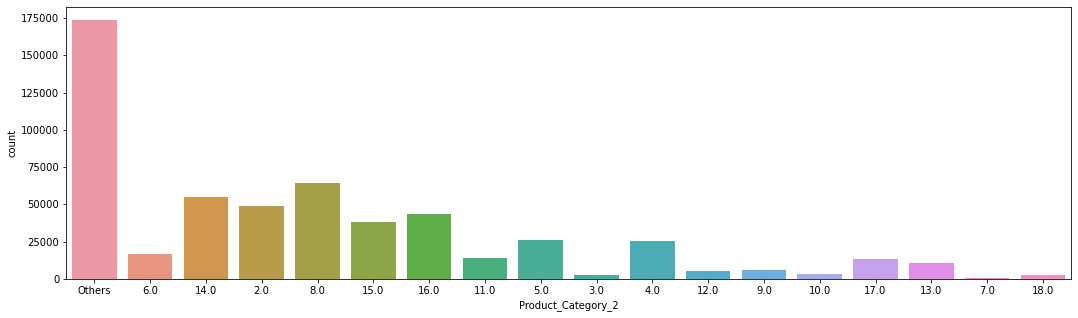

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'])
plt.show()

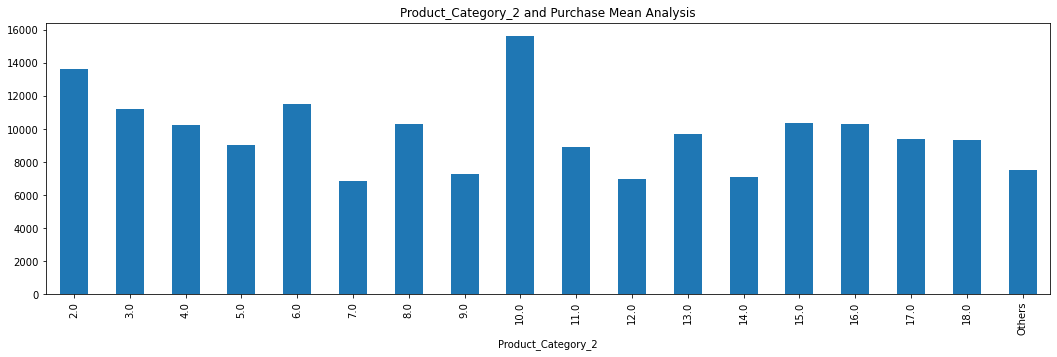

In [32]:
df.groupby('Product_Category_2').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 and Purchase Mean Analysis")
plt.show()

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  object
 7   Product_Category_2          550068 non-null  object
 8   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 37.8+ MB


In [34]:
df = pd.get_dummies(df)

In [35]:
df.head()

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_Others
0,0,8370,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,15200,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1422,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1057,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,7969,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Great! Our data is ready for our model!

In [36]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [37]:
scalerData = scaler.transform(df)
scalerData = pd.DataFrame(scalerData)

## Train Test Split

In [38]:
x = df.drop(['Purchase'],axis=1)

In [39]:
y = df['Purchase']

In [40]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

## Regression

In [41]:
def LinearReg(train_x,train_y,test_x):
    modelLinear=LinearRegression()
    modelLinear.fit(train_x,train_y)
    return modelLinear.predict(test_x)
    #return mean_squared_error(test_y, modelLinear.predict(test_x), squared=False)
def DecisionTreeReg(train_x,train_y,test_x):
    modeldtr = DecisionTreeRegressor(random_state=42)
    modeldtr.fit(train_x,train_y)
    return modeldtr.predict(test_x)
    #return mean_squared_error(test_y, modeldtr.predict(test_x), squared=False)
def RandomForestReg(train_x,train_y,test_x):
    modelRFR = RandomForestRegressor(max_depth=2, random_state=42)
    modelRFR.fit(train_x,train_y)
    return modelRFR.predict(test_x)
    #return mean_squared_error(test_y, modelRFR.predict(test_x), squared=False)
def GradientBoostingReg(train_x,train_y,test_x):
    modelgbr = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=42)
    modelgbr.fit(train_x,train_y)
    return modelgbr.predict(test_x)
    #return mean_squared_error(test_y, modelgbr.predict(test_x), squared=False)
def AdaBoostReg(train_x,train_y,test_x):
    modelabr = AdaBoostClassifier(random_state=42)
    modelabr.fit(train_x,train_y)
    return modelabr.predict(test_x)
    #return mean_squared_error(test_y, modelabr.predict(test_x), squared=False)

In [42]:
predictions = LinearReg(train_x,train_y,test_x)

### Linear Regression

In [43]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [44]:
model.predict(test_x)

array([13846., 13482.,  7140., ...,  7110.,  4434.,  9698.])

In [45]:
mean_squared_error(test_y, model.predict(test_x), squared=False)

3020.9936244392647

### Decision Tree Regression

In [46]:
modeldtr = DecisionTreeRegressor(random_state=42)
modeldtr.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [47]:
mean_squared_error(test_y, modeldtr.predict(test_x), squared=False)

3152.7088455753583

### Random Forest Regression

In [49]:
regressor = RandomForestRegressor(max_depth=2,random_state=42)
regressor.fit(train_x,train_y)

RandomForestRegressor(max_depth=2, random_state=42)

In [50]:
mean_squared_error(test_y, regressor.predict(test_x), squared=False)

4016.5357733997535

### Gradient Boosting Regressor

In [51]:
modelgbr = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=42)
modelgbr.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=2, random_state=42)

In [52]:
mean_squared_error(test_y, modelgbr.predict(test_x), squared=False)

3128.982680252029

### AdaBoostRegressor

In [53]:
regr = AdaBoostRegressor(random_state=42, n_estimators=100)
regr.fit(train_x,train_y)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [54]:
mean_squared_error(test_y, regr.predict(test_x), squared=False)

3777.8869873474932